In [1]:
#DC-OS generater
#predict OS length usiing DC length
#Failed
#lack of variables 

In [2]:
import pandas as pd
import numpy as np

class DCEventDetector:
    def __init__(self, dataframe, delta):
        self.eventsDC = []
        self.eventsOS = []
        self.delta = delta
        self.indexDC = [0, 0]
        self.indexOS = [0, 0]
        self.dataframe = dataframe

    def generateDC(self):
        countDC = 0
        countOS = 0
        delta = self.delta
        df = self.dataframe

        for index in range(len(df)):
            price = df.iloc[index]
            if (index == 0): #初期設定
                type = "Upturn"
                high = df.iloc[index]
                low = df.iloc[index]
                isExistOS = False

            else:
                if (type == "Upturn"):
                    if (price <= (high * (1 - delta))): #上昇トレンドから下降トレンドに転換
                        if (self.indexOS[0] >= self.indexOS[1]):
                            isExistOS = False
                        if (isExistOS is False):
                            if (countDC == 0):
                                countDC += 1
                                self.eventsDC.append((0, df.iloc[0], index, price, "DC Upturn", countDC))
                                #print(f"Upturn DCC with not OS at 0, DC count {countDC}, indexDC[0] {self.indexDC[0]}, indexDC[1] {index}, indexOS[0] {self.indexOS[0]}, indexOS[1] {self.indexOS[1]}")
                                

                            else:
                                countDC += 1
                                self.eventsDC.append((self.indexDC[0], df.iloc[self.indexDC[0]], index, price, "DC Upturn", countDC))
                                self.indexDC[0] = self.indexDC[1] + 1
                                #print(f"Upturn DCC with not OS, DC count {countDC}, indexDC[0] {self.indexDC[0]}, indexDC[1] {index}, indexOS[0] {self.indexOS[0]}, indexOS[1] {self.indexOS[1]}")
                        else:
                            countDC += 1
                            countOS = countDC - 1
                            self.eventsDC.append((self.indexDC[0], df.iloc[self.indexDC[0]], index, price, "DC Upturn", countDC))
                            self.eventsOS.append((self.indexOS[0], df.iloc[self.indexOS[0]], self.indexOS[1] , df.iloc[self.indexOS[1]] , "OS Upturn", countOS))
                            #print(f"Upturn DCC with OS , DC count {countDC}, indexDC[0] {self.indexDC[0]}, indexDC[1] {index}, indexOS[0] {self.indexOS[0]}, indexOS[1] {self.indexOS[1]}")               

                        self.indexDC[1] = index
                        self.indexOS[0] = index + 1
                        low = price
                        isExistOS = False
                        type = "Downturn"
                        #print(f"Change Index indexDC[0] {self.indexDC[0]}, indexDC[1] {self.indexDC[1]}, indexOS[0] {self.indexOS[0]}, indexOS[1] {self.indexOS[1]}")
                        continue

                    elif (high < price):
                        high = price
                        self.indexDC[0] = index
                        self.indexOS[1] = index - 1
                        isExistOS = True
                        #print(f"Upturn OS is valid, DC count {countDC}, indexDC[0] {self.indexDC[0]}, indexDC[1] {self.indexDC[1]}, indexOS[0] {self.indexOS[0]}, indexOS[1] {self.indexOS[1]}")

                    else:
                        #print("continue")
                        continue
                        
            
                elif (type == "Downturn"):
                    if (price >= (low * (1 + delta))): #下降トレンドから上昇トレンドに転換
                        if (self.indexOS[0] >= self.indexOS[1]):
                            isExistOS = False
                        if (isExistOS is False):
                            #print(f"Downturn DCC with not OS, DC count {countDC}, indexDC[0] {self.indexDC[0]}, indexDC[1] {index}, indexOS[0] {self.indexOS[0]}, indexOS[1] {self.indexOS[1]}")
                            countDC += 1                            
                            self.eventsDC.append((self.indexDC[0], df.iloc[self.indexDC[0]], index, price, "DC Downturn", countDC))
                            self.indexDC[0] = self.indexDC[1] + 1

                        else:
                            countDC += 1
                            countOS = countDC -1
                            self.eventsDC.append((self.indexDC[0], df.iloc[self.indexDC[0]], index, price, "DC Downturn", countDC))
                            self.eventsOS.append((self.indexOS[0], df.iloc[self.indexOS[0]], self.indexOS[1] , df.iloc[self.indexOS[1]] , "OS Downturn", countOS))
                            #print(f"Downturn DCC with OS, DC count {countDC}, indexDC[0] {self.indexDC[0]}, indexDC[1] {index}, indexOS[0] {self.indexOS[0]}, indexOS[1] {self.indexOS[1]}")

                        self.indexDC[1] = index
                        self.indexOS[0] = index + 1
                        high = price
                        isExistOS = False
                        type = "Upturn"
                        #print(f"Change Index indexDC[0] {self.indexDC[0]}, indexDC[1] {index}, indexOS[0] {self.indexOS[0]}, indexOS[1] {self.indexOS[1]}")
                        continue

                    elif (low > price):
                        low = price
                        self.indexDC[0] = index
                        self.indexOS[1] = index - 1
                        isExistOS = True
                        #print(f"Downturn OS is valid, DC count {countDC}, indexDC[0] {self.indexDC[0]}, indexDC[1] {self.indexDC[1]}, indexOS[0] {self.indexOS[0]}, indexOS[1] {self.indexOS[1]}")
                        
                    else:
                        #print("continue")
                        continue

        df_DC = pd.DataFrame(self.eventsDC, columns=["DC_Start_Index", "Price_DC_Start", "DC_End_Index", "Price_DC_End", "DC_Type", "Number"])
        df_OS = pd.DataFrame(self.eventsOS, columns=["OS_Start_Index", "Price_OS_Start", "OS_End_Index", "Price_OS_End", "OS_Type", "Number"])

        #最後のDCイベントにはOSイベントが続かないため削除
        df_DC = df_DC.iloc[:-1]
        df_OS = df_OS.iloc[1:]

        return df_DC, df_OS



In [3]:
import pandas as pd
phyisical_time_df = pd.read_csv('./USDJPY_10 Mins_Ask_2003.05.04_2024.03.29.csv')

In [4]:
price_df = phyisical_time_df["Close"]

In [5]:
price_df

0         118.946
1         118.963
2         118.969
3         118.970
4         119.003
           ...   
783379    151.385
783380    151.381
783381    151.382
783382    151.389
783383    151.378
Name: Close, Length: 783384, dtype: float64

In [6]:
dc_generator = DCEventDetector(price_df, 0.1)

In [7]:
df_dc, df_os = dc_generator.generateDC()

In [8]:
df_dc

,DC_Start_Index,Price_DC_Start,DC_End_Index,Price_DC_End,DC_Type,Number
0,5861,120.176,8640,106.600,DC Upturn,1
1,5861,120.176,9954,119.195,DC Downturn,2
2,10891,119.730,22284,107.720,DC Upturn,3
3,34366,103.500,38272,114.020,DC Downturn,4
4,38827,114.835,58269,103.339,DC Upturn,5
5,64146,101.750,81562,111.960,DC Downturn,6
6,97239,121.390,114109,109.055,DC Upturn,7
7,97239,121.390,138728,119.970,DC Downturn,8
8,155464,124.140,169848,111.580,DC Upturn,9
9,182912,95.915,187869,105.615,DC Downturn,10


In [9]:
df_os

,OS_Start_Index,Price_OS_Start,OS_End_Index,Price_OS_End,OS_Type,Number
1,9955,119.196,10890,119.580,OS Upturn,2
2,22285,107.700,34365,103.580,OS Downturn,3
3,38273,114.010,38826,114.832,OS Upturn,4
4,58270,103.269,64145,101.820,OS Downturn,5
5,81563,111.970,97238,121.360,OS Upturn,6
6,138729,119.920,155463,124.115,OS Upturn,8
7,169849,111.535,182911,96.750,OS Downturn,9
8,187870,105.455,198644,110.570,OS Upturn,10
9,204121,99.520,211350,87.405,OS Downturn,11
10,218258,95.930,222413,101.405,OS Upturn,12


In [10]:
import matplotlib.pyplot as plt

def plot_events_with_lines(price_df, df_dc, df_os):

    plt.figure(figsize=(30, 10))
    plt.plot(price_df)
    plt.scatter(df_dc["DC_Start_Index"], df_dc["Price_DC_Start"], color="orange", label='DC Start')
    plt.scatter(df_dc["DC_End_Index"], df_dc["Price_DC_End"], color="red", label='DC End')
    plt.scatter(df_os["OS_Start_Index"], df_os["Price_OS_Start"], color="cyan", label='OS Start')
    plt.scatter(df_os["OS_End_Index"], df_os["Price_OS_End"], color="blue", label='OS End')

    
    plt.legend()
    plt.show()

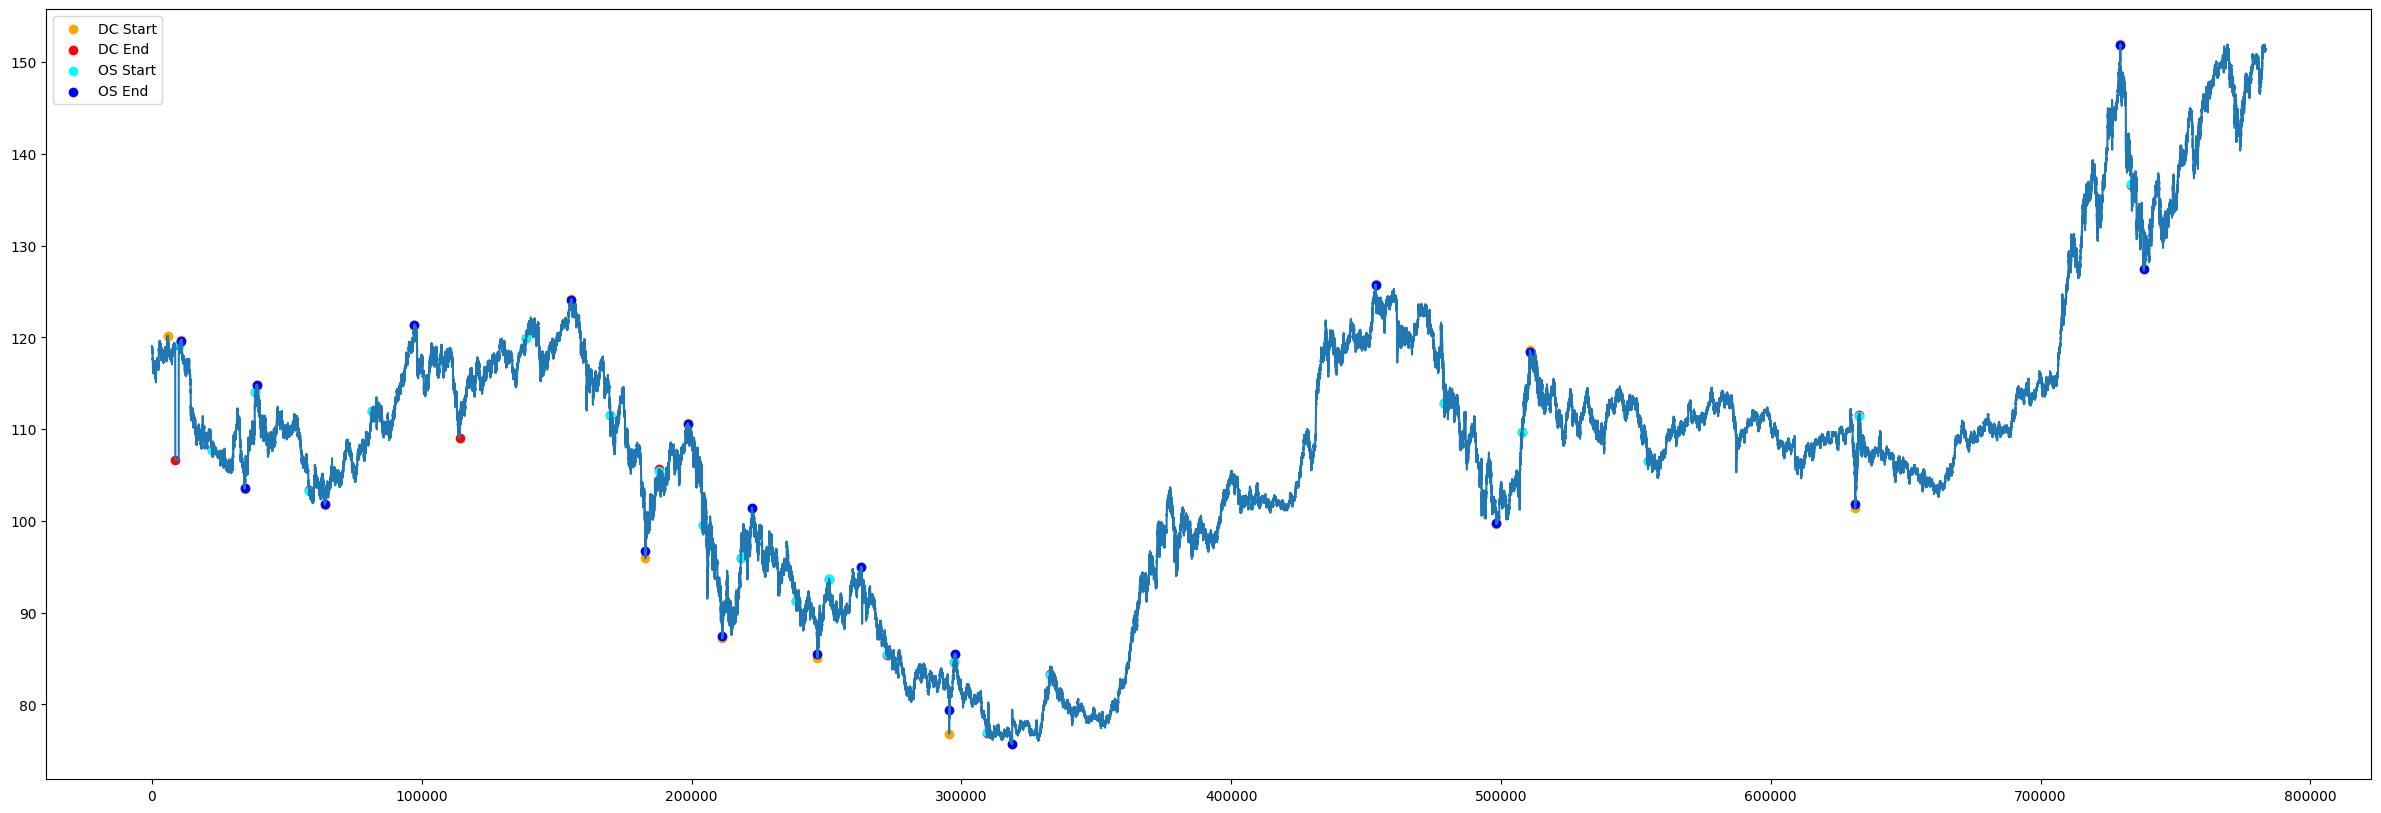

In [11]:
plot_events_with_lines(price_df, df_dc, df_os)

In [12]:
dc_generator = DCEventDetector(price_df, 0.005)
df_dc, df_os = dc_generator.generateDC()

In [13]:
def outputDataframeWithOvershoot(df_dc, df_os):
    connected_df = pd.merge(df_dc, df_os, on='Number', how='left')
    df_with_overshoot = connected_df[connected_df["OS_Start_Index"].notnull()]

    return df_with_overshoot

In [14]:
df_with_overshoot = outputDataframeWithOvershoot(df_dc, df_os)

In [15]:
df_with_overshoot[df_with_overshoot["DC_Start_Index"] == df_with_overshoot["DC_End_Index"]]

,DC_Start_Index,Price_DC_Start,DC_End_Index,Price_DC_End,DC_Type,Number,OS_Start_Index,Price_OS_Start,OS_End_Index,Price_OS_End,OS_Type


In [16]:
import matplotlib.pyplot as plt

def plotHistgramRatioDcOs(df_with_overshoot):
    df = df_with_overshoot.copy()
    df["Ratio_DC_OS"] = (df["OS_End_Index"] - df["OS_Start_Index"]) / (df["DC_End_Index"] - df["DC_Start_Index"])
    mean = df["Ratio_DC_OS"].mean()
    median = df["Ratio_DC_OS"].median()
    plt.axvline(median, color='y')
    plt.axvline(mean, color='r')


    plt.hist(df["Ratio_DC_OS"], bins=10000)
    plt.xlabel("Ratio of DC and OS")
    plt.ylabel("Frequency")
    plt.xlim(0, 50)
    plt.show()
    print(f"median: {median}, mean: {mean}")

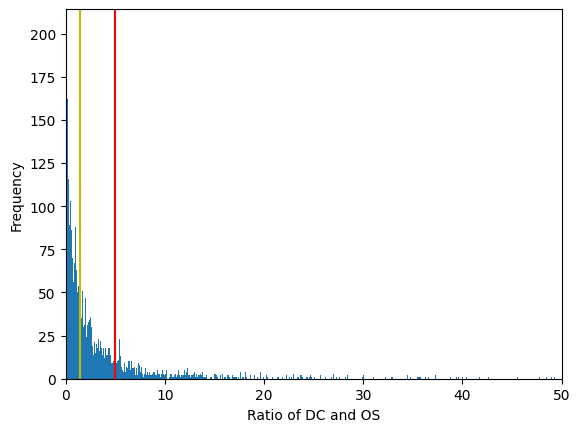

median: 1.4842105263157894, mean: 4.942114453155373


In [17]:
plotHistgramRatioDcOs(df_with_overshoot)

In [18]:
def plotHistgramRatioDcOsNotOutlier(df_with_overshoot):
    df = df_with_overshoot.copy()
    df["Ratio_DC_OS"] = (df["OS_End_Index"] - df["OS_Start_Index"]) / (df["DC_End_Index"] - df["DC_Start_Index"])

    per25 = df["Ratio_DC_OS"].quantile(0.25)
    per75 = df["Ratio_DC_OS"].quantile(0.75)
    iqr = per75 - per25
    upper = per75 + 1.5 * iqr

    df = df[(df["Ratio_DC_OS"] < upper)]

    mean = df["Ratio_DC_OS"].mean()
    median = df["Ratio_DC_OS"].median()
    plt.axvline(median, color='y')
    plt.line = plt.axvline(mean, color='r')

    plt.hist(df["Ratio_DC_OS"], bins=1000)
    plt.xlabel("Ratio of OS length to DC length")
    plt.ylabel("Frequency")
    plt.xlim(0, 10)
    plt.show()
    print(f"median: {median}, mean: {mean},")

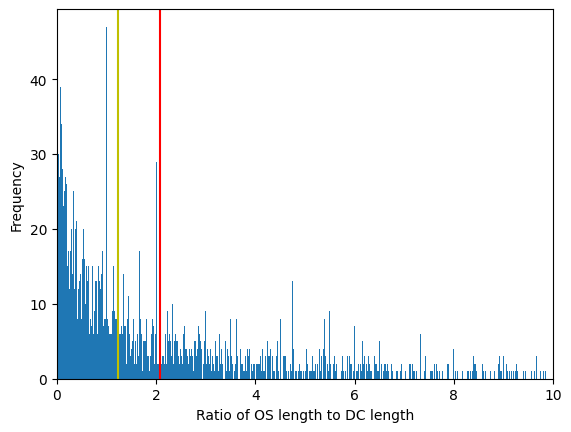

median: 1.2222222222222223, mean: 2.0837218785275664,


In [19]:
plotHistgramRatioDcOsNotOutlier(df_with_overshoot)

In [20]:
def plotBoxRationDcOs(df_with_overshoot):
    df = df_with_overshoot.copy()
    df["Ratio_DC_OS"] = (df["OS_End_Index"] - df["OS_Start_Index"]) / (df["DC_End_Index"] - df["DC_Start_Index"])
    plt.boxplot(df["Ratio_DC_OS"], vert=False, sym="", showmeans=True)
    plt.show()

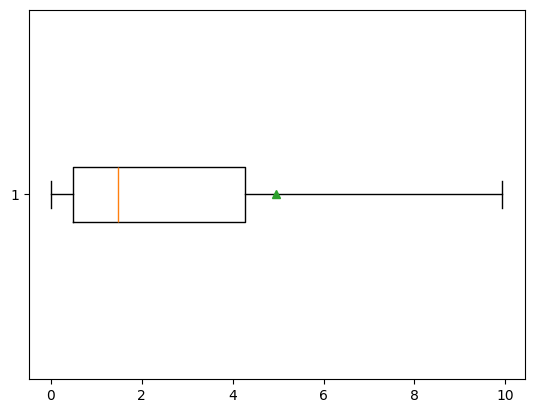

In [21]:
plotBoxRationDcOs(df_with_overshoot)

In [22]:
from gplearn.genetic import SymbolicRegressor 

def gpTuning(X, y, population_size, generations,
             tournament_size, stopping_criteria, const_range, init_Depth, init_method,
             function_set, metric, parsimony_coefficient, p_crossover, p_subtree_mutation,
             p_hoist_mutation, p_point_mutation, p_point_replace, n_jobs, verbose, random_state):

    model = SymbolicRegressor(population_size=population_size, generations=generations, stopping_criteria=stopping_criteria, const_range=const_range, 
                                         init_depth=init_Depth, init_method=init_method, function_set=function_set, metric=metric, parsimony_coefficient=parsimony_coefficient,
                                         p_crossover=p_crossover, p_subtree_mutation=p_subtree_mutation, p_hoist_mutation=p_hoist_mutation, p_point_mutation=p_point_mutation,
                                         p_point_replace=p_point_replace, tournament_size=tournament_size, n_jobs=n_jobs, verbose=verbose, random_state=random_state)
    
    optimized_model = model.fit(X, y)


    return optimized_model

def outputBestFitnessAndModel(optimized_model_list):
    tmp_fitness = np.inf
    for model in optimized_model_list:
        fitness = model._best_fitness
        if (fitness < tmp_fitness):
            best_fitness = fitness
            best_model = model
    
    return best_fitness, best_model



def outputBestThresholdAndModel(price_df, min_threshold, max_threshold, population_size, generations, tournament_size, 
                              stopping_criteria, const_range, init_Depth, init_method, function_set, metric, 
                              parsimony_coefficient, p_crossover, p_subtree_mutation, p_hoist_mutation, 
                              p_point_mutation, p_point_replace, n_jobs, verbose, random_state):
    
    optimized_model_list = []
    for threshold in np.arange(min_threshold, max_threshold, 0.0005):
        df = price_df.copy()
        dc_generator = DCEventDetector(df, threshold)
        df_dc, df_os = dc_generator.generateDC()
        df_with_overshoot = outputDataframeWithOvershoot(df_dc, df_os)

        X = (df_with_overshoot["DC_End_Index"] - df_with_overshoot["DC_Start_Index"]).values.reshape(-1, 1)
        y = (df_with_overshoot["OS_End_Index"] - df_with_overshoot["OS_Start_Index"]).values.reshape(-1, 1)


        optimized_model = gpTuning(X, y, population_size=population_size, generations=generations, tournament_size=tournament_size, stopping_criteria=stopping_criteria, const_range=const_range, 
                                  init_Depth=init_Depth, init_method=init_method, function_set=function_set, metric=metric, parsimony_coefficient=parsimony_coefficient,
                                  p_crossover=p_crossover, p_subtree_mutation=p_subtree_mutation, p_hoist_mutation=p_hoist_mutation, p_point_mutation=p_point_mutation,
                                  p_point_replace=p_point_replace, n_jobs=n_jobs, verbose=verbose, random_state=random_state)
        
        optimized_model_list.append(optimized_model)

    return optimized_model_list
        


In [23]:
from gplearn import functions

#def _exp(x):
#    max_value = 1000
#    result = np.exp(x)

#    return np.where((np.isinf(result) | np.isnan(result)), max_value, result)
        
    

#mtd_pow = functions.make_function(function=_pow, name='pow', arity=2)
#mtd_exp = functions.make_function(function=_exp, name='exp', arity=1)

optimized_model_list = outputBestThresholdAndModel(price_df, min_threshold=0.005, max_threshold=0.01, population_size=1000, generations=100, tournament_size=20, 
                            stopping_criteria=3, const_range=(0, 10), init_Depth=(3, 9), init_method='half and half', 
                            function_set=('add', 'sub', 'mul', 'div', 'log', 'sin', 'cos'), 
                            metric='rmse', parsimony_coefficient='auto', p_crossover=0.96, p_subtree_mutation=0.01, p_hoist_mutation=0.01,
                            p_point_mutation=0.01, p_point_replace=0.01, n_jobs=4, verbose=1, random_state=1234)



c:\Users\yuhei\anaconda3\envs\pytorch_env\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    59.31      1.55136e+12       21          179.079              N/A      1.45m
   1     6.71          19227.2        6          181.223              N/A     21.30s
   2     2.14          2674.54        3          187.444              N/A     19.49s
   3     1.13          194.211        1          189.727              N/A     19.70s
   4     1.06          189.973        3          187.373              N/A     19.39s
   5     1.07          236.665        3          188.777              N/A     19.19s
   6     1.14           197.62        1          189.727              N/A     18.85s
   7     1.03          189.919        1          189.727              N/A     20.36s
   8     1.05          193.569        1          189.727              N/A  

c:\Users\yuhei\anaconda3\envs\pytorch_env\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    59.31      2.09814e+12       21          204.456              N/A     28.99s
   1     6.71          19828.7       11          204.457              N/A     21.67s
   2     2.13          683.869        3          211.035              N/A     21.47s
   3     1.13          219.453        1           213.45              N/A     21.27s
   4     1.06          213.752        3          210.959              N/A     20.27s
   5     1.07          271.149        3          212.451              N/A     36.64s
   6     1.14          221.714        1           213.45              N/A     19.98s
   7     1.03           213.69        1           213.45              N/A     18.79s
   8     1.05          216.004        1           213.45              N/A  

c:\Users\yuhei\anaconda3\envs\pytorch_env\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    59.31      7.86348e+11       21          234.931              N/A     28.74s
   1     6.71            26725       11          233.403              N/A     22.98s
   2     2.13            867.6        3          240.142              N/A     21.13s
   3     1.13          249.562        1          242.578              N/A     20.89s
   4     1.06          242.932        3          240.065              N/A     48.76s
   5     1.07          306.977        3          241.574              N/A     19.43s
   6     1.14           251.14        1          242.578              N/A     18.87s
   7     1.03          242.854        1          242.578              N/A     20.24s
   8     1.05          246.448        1          242.578              N/A  

c:\Users\yuhei\anaconda3\envs\pytorch_env\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    59.31      9.47005e+11       21            263.2              N/A     26.55s
   1     6.71          33732.6       11          260.846              N/A     21.37s
   2     2.13          2082.48        3          265.165              N/A     22.57s
   3     1.13          275.819        1          267.571              N/A     21.03s
   4     1.06          267.985        3          265.088              N/A      1.06m
   5     1.07          346.669        3          266.582              N/A     20.77s
   6     1.14          276.343        1          267.571              N/A     20.40s
   7     1.03          267.894        1          267.571              N/A     20.30s
   8     1.05          272.115        1          267.571              N/A  

c:\Users\yuhei\anaconda3\envs\pytorch_env\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    59.31      2.54165e+12       14          299.467              N/A     25.32s
   1     6.71          42225.6       11          297.282              N/A     22.90s
   2     2.13          2199.63        3          300.227              N/A     21.03s
   3     1.13          311.625        1          302.613              N/A     20.72s
   4     1.06          303.061        3          300.151              N/A     19.33s
   5     1.07          391.443        3          301.635              N/A     20.55s
   6     1.14          311.446        1          302.613              N/A     20.28s
   7     1.03          302.964        1          302.613              N/A     20.04s
   8     1.05          307.179        1          302.613              N/A  

c:\Users\yuhei\anaconda3\envs\pytorch_env\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    59.31      2.08557e+12       62          329.253              N/A     25.78s
   1     6.71          45494.1        3          331.689              N/A     23.07s
   2     2.12             1531        3          331.608              N/A     22.79s
   3     1.13          340.952        1           334.01              N/A     23.87s
   4     1.06           334.54        3          331.531              N/A     21.01s
   5     1.07           433.23        3          333.027              N/A     22.37s
   6     1.14          343.044        1           334.01              N/A     21.66s
   7     1.03          334.427        1           334.01              N/A     21.33s
   8     1.05          339.942        1           334.01              N/A  

c:\Users\yuhei\anaconda3\envs\pytorch_env\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    59.31      4.39768e+12       62          366.697              N/A     23.03s
   1     6.71          50359.8        3          371.103              N/A     21.68s
   2     2.12          2441.47        3            370.9              N/A     21.17s
   3     1.13          380.307        1           373.16              N/A     20.98s
   4     1.06          373.708        3          370.827              N/A     21.73s
   5     1.07          508.082        3          372.236              N/A     20.54s
   6     1.14          382.541        1           373.16              N/A     20.38s
   7     1.03          373.589        1           373.16              N/A     20.52s
   8     1.05          380.719        1           373.16              N/A  

c:\Users\yuhei\anaconda3\envs\pytorch_env\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    59.31      5.44362e+12       62           410.28              N/A     22.77s
   1     6.71          61779.5        3          413.604              N/A     21.59s
   2     2.12          3129.09        3          413.405              N/A     22.86s
   3     1.13          423.323        1          415.619              N/A     21.36s
   4     1.06          416.202        3          413.334              N/A     20.84s
   5     1.07            578.3        3          414.716              N/A     20.60s
   6     1.14          424.984        1          415.619              N/A     20.52s
   7     1.03           416.08        1          415.619              N/A     20.04s
   8     1.05          423.126        1          415.619              N/A  

c:\Users\yuhei\anaconda3\envs\pytorch_env\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    59.31      6.75562e+12       62          449.428              N/A     23.05s
   1     6.71          59954.5        3          453.969              N/A     21.64s
   2     2.12          4295.74        3          453.773              N/A     21.48s
   3     1.13          464.697        1          455.952              N/A     20.92s
   4     1.06          456.614        3          453.702              N/A     20.81s
   5     1.07          640.248        3          455.064              N/A     20.45s
   6     1.14           465.68        1          455.952              N/A     21.72s
   7     1.03          456.472        1          455.952              N/A     20.04s
   8     1.05           465.43        1          455.952              N/A  

c:\Users\yuhei\anaconda3\envs\pytorch_env\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    59.31      5.56244e+12       62          483.999              N/A     22.43s
   1     6.71            72134        3          488.851              N/A     21.37s
   2     2.12          1966.05        3          488.646              N/A     22.74s
   3     1.13          500.764        1          490.911              N/A     20.94s
   4     1.06          491.661        3          488.573              N/A     21.90s
   5     1.07           698.57        3           489.99              N/A     20.68s
   6     1.14          500.636        1          490.911              N/A     23.25s
   7     1.03          491.495        1          490.911              N/A     20.22s
   8     1.05          498.754        1          490.911              N/A  

In [24]:
#Fitnessが増加しているため、学習が失敗している

In [25]:
#結果の確認
model = optimized_model_list[-1]

example_X = (df_with_overshoot["DC_End_Index"] - df_with_overshoot["DC_Start_Index"]).iloc[:10].values.reshape(-1, 1)

predict = np.ceil(model.predict(example_X).reshape(1, -1))
true = (df_with_overshoot["OS_End_Index"] - df_with_overshoot["OS_Start_Index"]).iloc[:10].values.reshape(1, -1)

print(f"predict:{predict}")
print(f"true:{true}")

predict:[[156.  25. 109.  72.  22.  18.  23.  17. 112.  29.]]
true:[[364.  81.  51.  37.   9.   8. 278.  40. 104. 121.]]
